In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
!cp "/content/drive/MyDrive/dms.v1i.yolov8.zip" "/content/drive/MyDrive/dms.v1i.yolov8.zip"
!unzip "/content/drive/MyDrive/dms.v1i.yolov8.zip"

cp: '/content/drive/MyDrive/dms.v1i.yolov8.zip' and '/content/drive/MyDrive/dms.v1i.yolov8.zip' are the same file
Archive:  /content/drive/MyDrive/dms.v1i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/2024_01_25_10_50_IMG_7071_JPG.rf.28adf794f92ee9223fc5fa399b18a36f.jpg  
 extracting: test/images/2024_01_25_10_50_IMG_7072_JPG.rf.cd61c39c3478c903cf24aa8009f4f578.jpg  
 extracting: test/images/2024_01_25_10_50_IMG_7074_JPG.rf.d4db65ed700529ad8b5d14f28c2fb000.jpg  
 extracting: test/images/2024_01_25_10_51_IMG_7079_JPG.rf.9074a03aeeccbe1d2ac5f4b59b259b18.jpg  
 extracting: test/images/2024_01_25_10_51_IMG_7083_JPG.rf.df85bf750db92f69b471b6112dea65fa.jpg  
 extracting: test/images/2024_01_25_10_51_IMG_7084_JPG.rf.68cbca93478f5614d5f54217bcf3ac22.jpg  
 extracting: test/images/2024_01_25_10_59_IMG_7104_JPG.rf.36fbe4ceb92feab9d53e5d96d6a7425b.jp

In [4]:
#Training YOLOv8 on a custom dataset
!yolo task = detect mode = train model = yolov8n.pt data = /content/data.yaml epochs = 50 imgsz= 650 project = /content/drive/MyDrive/Driver_action/New_result

100% 6.23M/6.23M [00:00<00:00, 50.5MB/s]
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Driver_action/New_result, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

In [9]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Driver_action/New_result/train/weights/best.pt source = /content/test/images/2024_01_25_10_50_IMG_7071_JPG.rf.28adf794f92ee9223fc5fa399b18a36f.jpg  project = /content/drive/MyDrive/Driver_action/New_result

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/2024_01_25_10_50_IMG_7071_JPG.rf.28adf794f92ee9223fc5fa399b18a36f.jpg: 672x672 1 NORMAL DRIVING, 18.1ms
Speed: 12.7ms preprocess, 18.1ms inference, 3043.9ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Driver_action/New_result/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [10]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Driver_action/New_result/train/weights/best.pt source = /content/test/images/2024_01_25_10_50_IMG_7072_JPG.rf.cd61c39c3478c903cf24aa8009f4f578.jpg  project = /content/drive/MyDrive/Driver_action/New_result

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/2024_01_25_10_50_IMG_7072_JPG.rf.cd61c39c3478c903cf24aa8009f4f578.jpg: 672x672 1 NORMAL DRIVING, 9.8ms
Speed: 5.9ms preprocess, 9.8ms inference, 1957.6ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Driver_action/New_result/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Driver_action/New_result/train/weights/best.pt source = /content/test/images/2024_01_25_10_50_IMG_7074_JPG.rf.d4db65ed700529ad8b5d14f28c2fb000.jpg  project = /content/drive/MyDrive/Driver_action/New_result

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/2024_01_25_10_50_IMG_7074_JPG.rf.d4db65ed700529ad8b5d14f28c2fb000.jpg: 672x672 1 NORMAL DRIVING, 15.3ms
Speed: 13.8ms preprocess, 15.3ms inference, 2963.5ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Driver_action/New_result/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Driver_action/New_result/train/weights/best.pt source = /content/test/images/2024_01_25_10_51_IMG_7083_JPG.rf.df85bf750db92f69b471b6112dea65fa.jpg  project = /content/drive/MyDrive/Driver_action/New_result

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/2024_01_25_10_51_IMG_7083_JPG.rf.df85bf750db92f69b471b6112dea65fa.jpg: 672x672 1 NORMAL DRIVING, 9.6ms
Speed: 5.8ms preprocess, 9.6ms inference, 2021.7ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Driver_action/New_result/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [13]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Driver_action/New_result/train/weights/best.pt source = /content/test/images project = /content/drive/MyDrive/Driver_action/New_result

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/34 /content/test/images/2024_01_25_10_50_IMG_7071_JPG.rf.28adf794f92ee9223fc5fa399b18a36f.jpg: 672x672 1 NORMAL DRIVING, 9.9ms
image 2/34 /content/test/images/2024_01_25_10_50_IMG_7072_JPG.rf.cd61c39c3478c903cf24aa8009f4f578.jpg: 672x672 1 NORMAL DRIVING, 13.6ms
image 3/34 /content/test/images/2024_01_25_10_50_IMG_7074_JPG.rf.d4db65ed700529ad8b5d14f28c2fb000.jpg: 672x672 1 NORMAL DRIVING, 10.0ms
image 4/34 /content/test/images/2024_01_25_10_51_IMG_7079_JPG.rf.9074a03aeeccbe1d2ac5f4b59b259b18.jpg: 672x672 1 NORMAL DRIVING, 9.3ms
image 5/34 /content/test/images/2024_01_25_10_51_IMG_7083_JPG.rf.df85bf750db92f69b471b6112dea65fa.jpg: 672x672 1 NORMAL DRIVING, 9.0ms
image 6/34 /content/test/images/2024_01_25_10_51_IMG_7084_JPG.rf.68cbca93478f5614d5f54217bcf3ac22.jpg: 672x672 1 DISTRACTED BY OUTSIDE SCENES, 12.8ms
image 

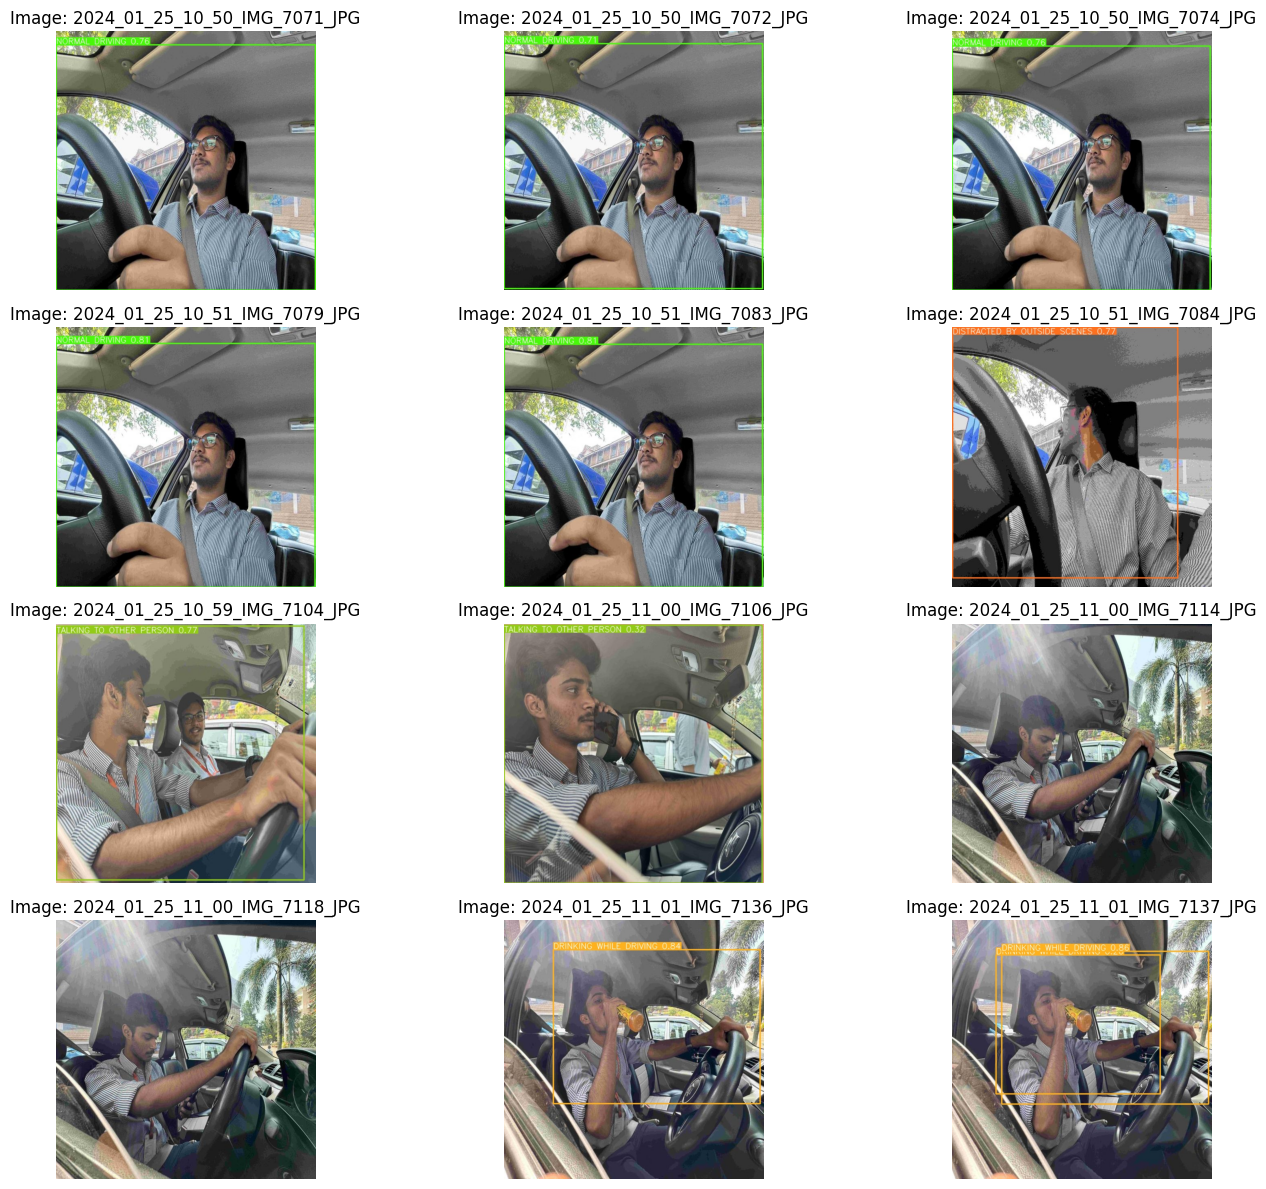

In [14]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/Driver_action/New_result/predict9'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

# Define the grid size (rows, columns) for displaying images
rows, cols = 4, 3

# Calculate the total number of grid positions
total_grid_positions = rows * cols

# Create a new figure for displaying the images
plt.figure(figsize=(15, 12))  # Increase the figure size here

# Limit the number of images to display based on grid size and maximum (12)
num_images_to_display = min(len(image_files), total_grid_positions, 12)

# Loop through each image file and display it using OpenCV and Matplotlib
for i in range(num_images_to_display):
    image_file = image_files[i]
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is not None:
        # Convert the image from BGR to RGB for proper display using Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Add the image to the grid
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.title(f"Image: {image_file.split('.')[0]}")
        plt.axis('off')
    else:
        print(f"Error reading image: {image_path}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

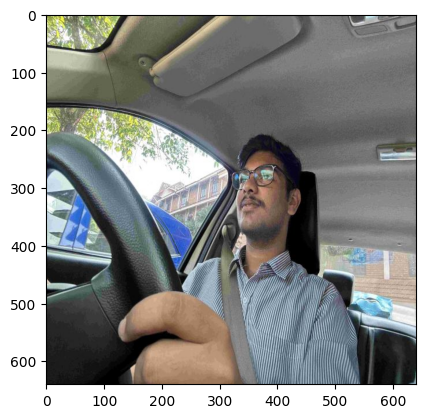

In [15]:
# input image
original_image = cv2.imread('/content/test/images/2024_01_25_10_51_IMG_7079_JPG.rf.9074a03aeeccbe1d2ac5f4b59b259b18.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

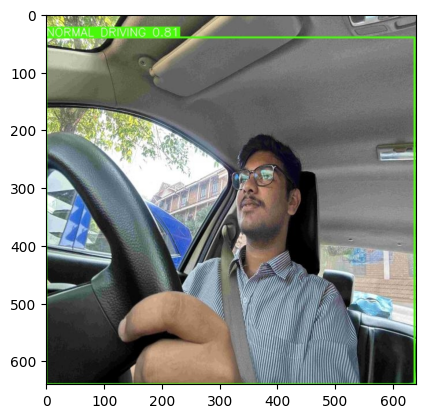

In [16]:
# Plotting the predicted image along with confidence
predicted_image = cv2.imread('/content/drive/MyDrive/Driver_action/New_result/predict9/2024_01_25_10_51_IMG_7079_JPG.rf.9074a03aeeccbe1d2ac5f4b59b259b18.jpg')
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))